### Part 1 - Introduction

### Part 2 - Scikit learn demo
#### Part 2.1 - Base code

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [210]:
# Load and clean data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

print("Nombre d'entrées et nombre de colonnes :")
print(data.shape)

# Define X and y
X = data.drop(columns=['class'])
y = data['class']

Nombre d'entrées et nombre de colonnes :
(768, 9)


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)

scores = np.nan_to_num(selector.scores_, nan=0.0)

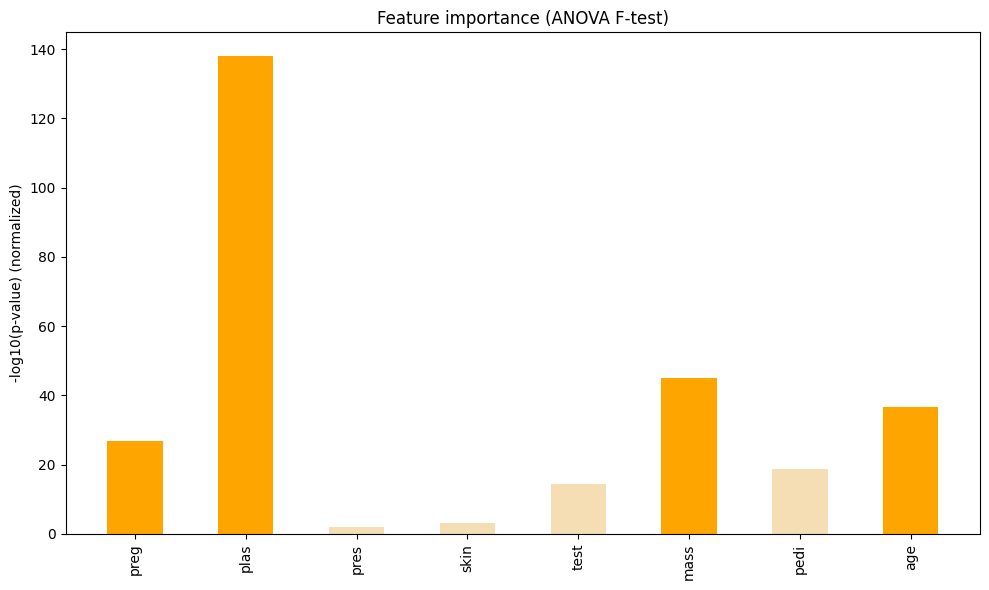

In [212]:
plt.figure(figsize=(10, 6))
top_k_indices = np.argsort(scores)[-4:]
colors = ['orange' if i in top_k_indices else 'wheat' for i in range(len(scores))]
plt.bar(range(len(scores)), scores, tick_label=X.columns, width=0.5, color=colors)
plt.xticks(rotation=90)
plt.ylabel("-log10(p-value) (normalized)")
plt.title("Feature importance (ANOVA F-test)")
plt.tight_layout()
plt.show()

In [213]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(selector, MinMaxScaler(), LinearSVC())

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with top 4 features: {accuracy:.3f}")

Accuracy with top 4 features: 0.766


#### Part 2.2 - Comparison with different methods

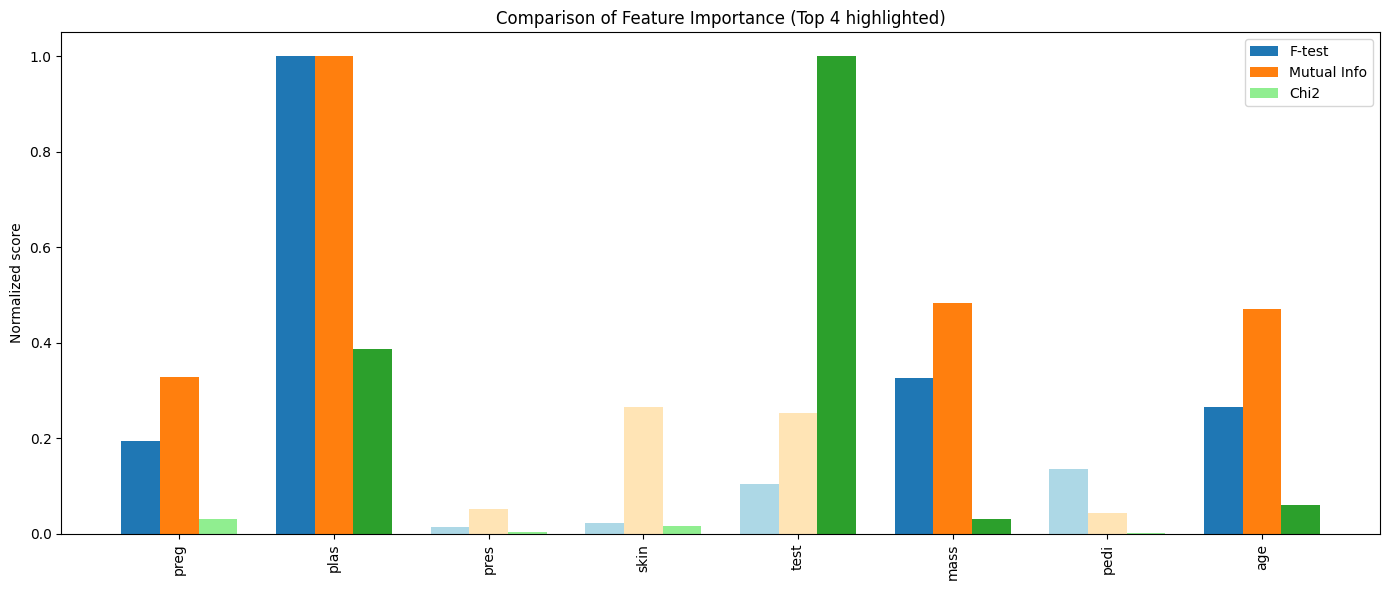

In [214]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Scoring functions
methods = {
    'F-test': f_classif,
    'Mutual Info': mutual_info_classif,
    'Chi2': chi2
}

# Color palette: (bright color, light version)
colors_map = {
    'F-test': ('tab:blue', 'lightblue'),
    'Mutual Info': ('tab:orange', 'moccasin'),
    'Chi2': ('tab:green', 'lightgreen')
}

all_scores = {}

for name, score_func in methods.items():
    selector = SelectKBest(score_func=score_func, k='all')
    selector.fit(X_train, y_train)
    scores = np.nan_to_num(selector.scores_, nan=0.0)
    scores /= np.nanmax(scores)
    all_scores[name] = scores

# Plotting
labels = X.columns
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(14, 6))

for idx, (method_name, scores) in enumerate(all_scores.items()):
    bright, light = colors_map[method_name]
    offset = (idx - 1) * width

    # Highlight top 4 features
    top_k = np.argsort(scores)[-4:]
    bar_colors = [bright if i in top_k else light for i in range(len(scores))]

    plt.bar(x + offset, scores, width, label=method_name, color=bar_colors)

plt.xticks(x, labels, rotation=90)
plt.ylabel("Normalized score")
plt.title("Comparison of Feature Importance (Top 4 highlighted)")
plt.legend()
plt.tight_layout()
plt.show()
